Task 3: Customer Segmentation / Clustering

Step 1: Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score

Step 2: Load and Inspect Data

In [2]:
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')

print(customers.head())
print(transactions.head())

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price  
0      300.68  300.68  
1      300.68  300.68  
2      300.68  300.68  
3      601.36  300.68  
4      902.04  300.68  


Step 3: Data Preprocessing

In [5]:
transaction_summary = transactions.groupby('CustomerID').agg({'TotalValue': 'sum', 'Quantity': 'sum'}).reset_index()
customer_transactions = pd.merge(customers, transaction_summary, on='CustomerID', how='left')

customer_transactions = customer_transactions.fillna(0)

customer_transactions = pd.get_dummies(customer_transactions, columns=['Region'], drop_first=True)

print(customer_transactions.head())


  CustomerID        CustomerName  SignupDate  TotalValue  Quantity  \
0      C0001    Lawrence Carroll  2022-07-10     3354.52      12.0   
1      C0002      Elizabeth Lutz  2022-02-13     1862.74      10.0   
2      C0003      Michael Rivera  2024-03-07     2725.38      14.0   
3      C0004  Kathleen Rodriguez  2022-10-09     5354.88      23.0   
4      C0005         Laura Weber  2022-08-15     2034.24       7.0   

   Region_Europe  Region_North America  Region_South America  
0          False                 False                  True  
1          False                 False                 False  
2          False                 False                  True  
3          False                 False                  True  
4          False                 False                 False  


Step 4: Feature Scaling

In [15]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

numerical_features = customer_transactions[['TotalValue', 'Quantity']]

customer_transactions_encoded = pd.get_dummies(customer_transactions, columns=['Region_Europe', 'Region_North America', 'Region_South America'])

numerical_features_all = customer_transactions_encoded.select_dtypes(include=['float64', 'int64'])

scaler = StandardScaler()
scaled_features_all = scaler.fit_transform(numerical_features_all)


Step 5: Clustering with K-Means (Trying Different Numbers of Clusters)

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import pandas as pd

numerical_features = customer_transactions[['TotalValue', 'Quantity']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(numerical_features)

db_indexes = []

for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(scaled_features)
    
    db_index = davies_bouldin_score(scaled_features, clusters)
    db_indexes.append(db_index)

    customer_transactions[f'Cluster_{n_clusters}'] = clusters

for n_clusters, db_index in zip(range(2, 11), db_indexes):
    print(f"Number of clusters: {n_clusters}, DB Index: {db_index}")


Number of clusters: 2, DB Index: 0.6298644531019864
Number of clusters: 3, DB Index: 0.6790773231366432
Number of clusters: 4, DB Index: 0.7102764046737506
Number of clusters: 5, DB Index: 0.7529350579420507
Number of clusters: 6, DB Index: 0.8164295471714539
Number of clusters: 7, DB Index: 0.7790991322899361
Number of clusters: 8, DB Index: 0.8993608517663892
Number of clusters: 9, DB Index: 0.8232396439456049
Number of clusters: 10, DB Index: 0.8554143386495813


Step 6: Optimal Number of Clusters

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import numpy as np

numerical_features = customer_transactions[['TotalValue', 'Quantity']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(numerical_features)

db_indexes = []

for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(scaled_features)
    
    db_index = davies_bouldin_score(scaled_features, clusters)
    db_indexes.append(db_index)

    customer_transactions[f'Cluster_{n_clusters}'] = clusters

if db_indexes:
    optimal_n_clusters = np.argmin(db_indexes) + 2  # Add 2 because range starts from 2
    print(f"The optimal number of clusters is: {optimal_n_clusters}")
else:
    print("DB Index list is empty. Please check the clustering process.")


The optimal number of clusters is: 2


Step 7: Visualization

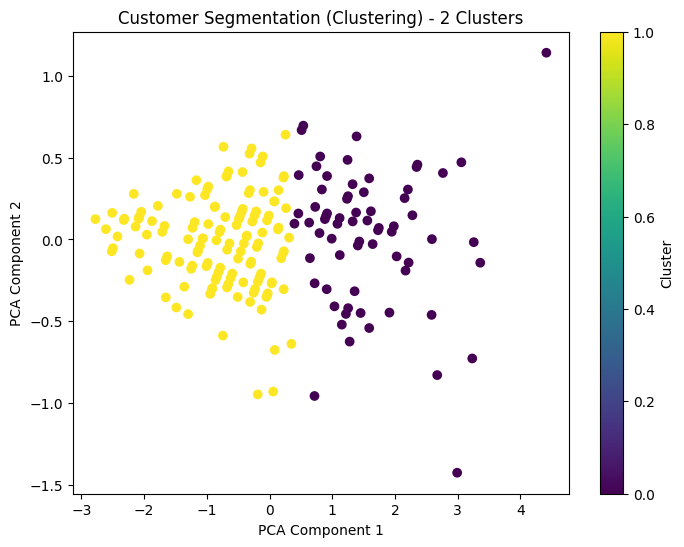

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

numerical_features = customer_transactions[['TotalValue', 'Quantity']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(numerical_features)

pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)

plt.figure(figsize=(8, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=customer_transactions[f'Cluster_{optimal_n_clusters}'], cmap='viridis')
plt.title(f'Customer Segmentation (Clustering) - {optimal_n_clusters} Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()
